# Projeto Análise de Dados 1

- Publishing Year: Ano de publicação do livro. (Numeric)
- Book Name: Título do livro. (Text)
- Author: Nome do autor. (Text)
- language_code: Código que representa a linguagem em que o livro foi escrito. (Text)
- Author_Rating: Rating do autor baseado em trabalhos prévios. (Numeric)
- Book_average_rating: Rating médio dado ao livro pelos leitores. (Numeric)
- Book_ratings_count: Número de ratings dados pelos leitores. (Numeric)
- genre: Gênero do livro. (Text)
- gross sales: Total de receita gerada pelas vendas do livro. (Numeric)
- publisher revenue: A receita recebida pela publicadora do livro. (Numeric)
- sale price: Preço de vendo do livro. (Numeric)
- sales rank: Ranking da venda do livro. (Numeric)
- units sold: Número de unidades vendidas. (Numeric)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [39]:
# verificação resumida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [40]:
# quantidade de nulos
df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [41]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [42]:
df = df[df['Publishing Year'] >= 1900]

In [43]:
# quantidade de nulos
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [44]:
# retirando as linhas sem o nome do livro
df = df[~df["Book Name"].isna()]

In [45]:
# verificação das duplicidade
df.duplicated().sum()

0

In [46]:
# verificação dos valores nulos
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

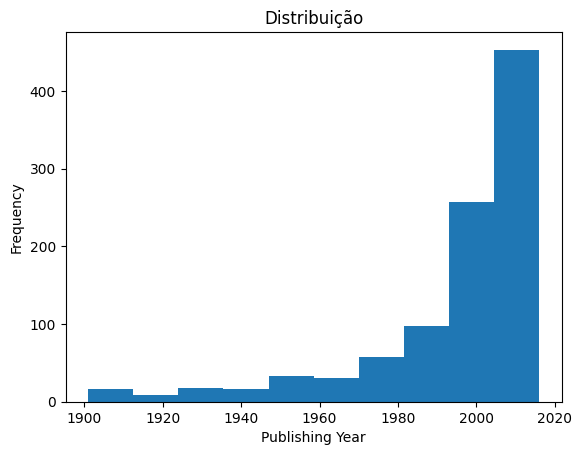

In [47]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title('Distribuição');

In [48]:
df['genre'].value_counts()

genre
genre fiction    759
nonfiction       160
fiction           54
children          15
Name: count, dtype: int64

In [49]:
# correção do nome de genero
df['genre'] = df['genre'].apply(lambda genre: "fiction" if genre == "genre fiction" else genre)

In [50]:
df['genre'].value_counts()

genre
fiction       813
nonfiction    160
children       15
Name: count, dtype: int64

<Axes: xlabel='genre'>

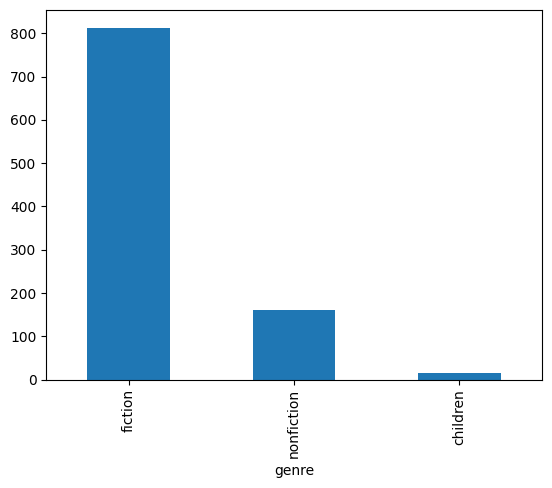

In [51]:
df["genre"].value_counts().plot(kind="bar")

In [52]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

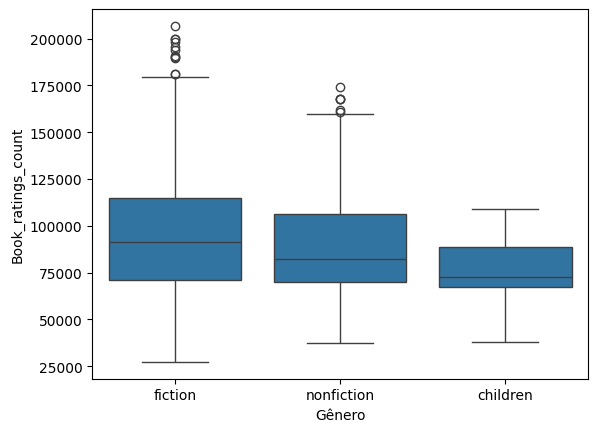

In [53]:
sns.boxplot(x="genre", y="Book_ratings_count", data=df)
plt.xlabel("Gênero");

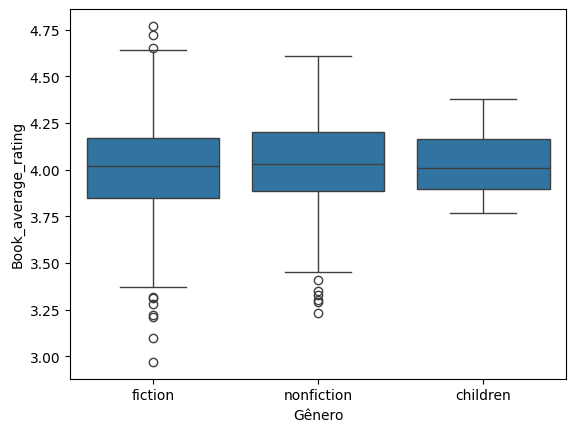

In [54]:
sns.boxplot(x="genre", y="Book_average_rating", data=df)
plt.xlabel("Gênero");

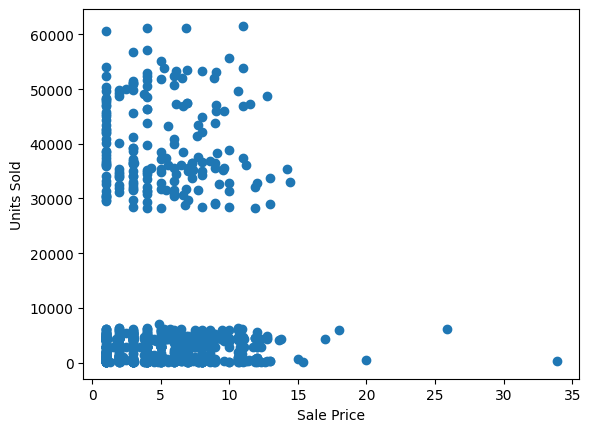

In [55]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold");

In [56]:
df["language_code"].value_counts()

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

In [57]:
language_counts = df["language_code"].value_counts()

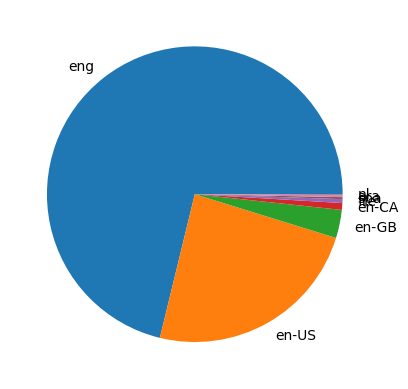

In [58]:
plt.pie(language_counts, labels=language_counts.index);

In [64]:
df.groupby('Publisher ')["publisher revenue"].sum().sort_values(ascending=False)


Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [65]:
print(df.columns)

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')


In [66]:
df["Author_Rating"].value_counts()

Author_Rating
Intermediate    576
Excellent       336
Famous           48
Novice           28
Name: count, dtype: int64

In [67]:
df.groupby("Author_Rating")["Book_ratings_count"].sum()

Author_Rating
Excellent       28158413
Famous           4718172
Intermediate    58406557
Novice           2444917
Name: Book_ratings_count, dtype: int64

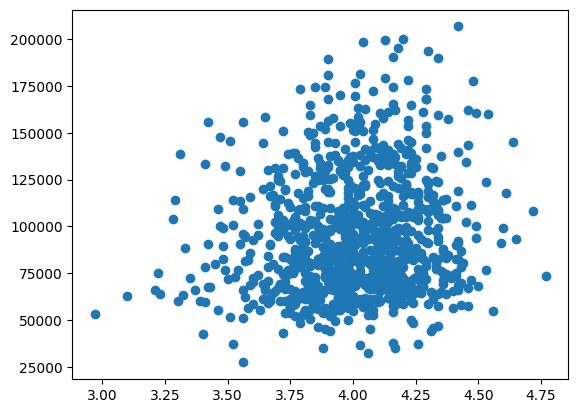

In [69]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"]);

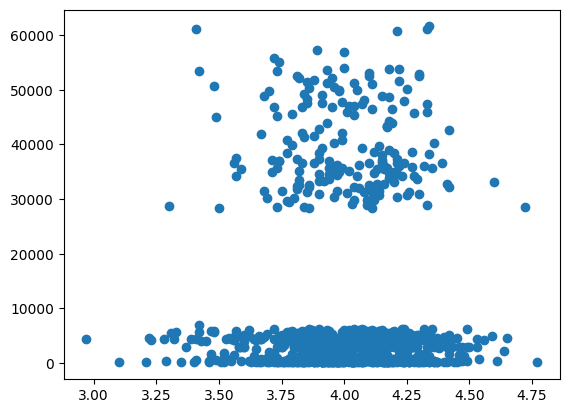

In [70]:
plt.scatter(df["Book_average_rating"], df["units sold"]);

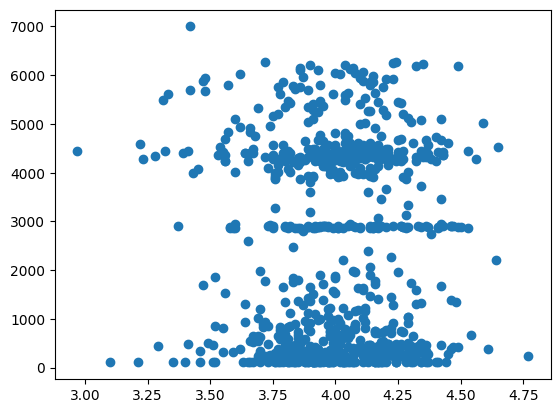

In [71]:
booleano = df["units sold"] < 10000

plt.scatter(df[booleano]["Book_average_rating"], df[booleano]["units sold"]);

In [72]:
df.groupby("Author")["gross sales"].sum()

Author
A.A. Milne, Ernest H. Shepard                       214.92
A.S.A. Harrison                                     784.16
Abbi Glines                                        2990.16
Adam Johnson                                        108.90
Adam Mansbach, Ricardo CortÃ©s                      113.85
                                                    ...   
William Styron                                      220.89
Yana Toboso, Tomo Kimura                           1366.86
Zadie Smith                                         167.31
Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi    1200.10
Ø£Ø­Ù…Ø¯ Ù…Ø±Ø§Ø¯                                  1128.87
Name: gross sales, Length: 669, dtype: float64

In [73]:
df.groupby("Author")["gross sales"].sum().sort_values(ascending=False)

Author
Harper Lee              47795.00
Stephen King            43322.65
David Sedaris           42323.41
Charlaine Harris        39453.08
Laini Taylor            38278.41
                          ...   
Frank Warren              107.91
Ayaan Hirsi Ali           107.91
Walter M. Miller Jr.      106.92
Michael Shaara            105.93
Blake Crouch              105.93
Name: gross sales, Length: 669, dtype: float64

In [74]:
print(df.columns)

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')


In [75]:
# correlação das colunas numericas
df[["Book_average_rating",
    "Book_ratings_count",
    "gross sales",
    "sale price"]].corr()

,Book_average_rating,Book_ratings_count,gross sales,sale price
Book_average_rating,1.000000,0.120600,-0.042815,-0.015232
Book_ratings_count,0.120600,1.000000,0.489752,-0.067698
gross sales,-0.042815,0.489752,1.000000,0.269951
sale price,-0.015232,-0.067698,0.269951,1.000000


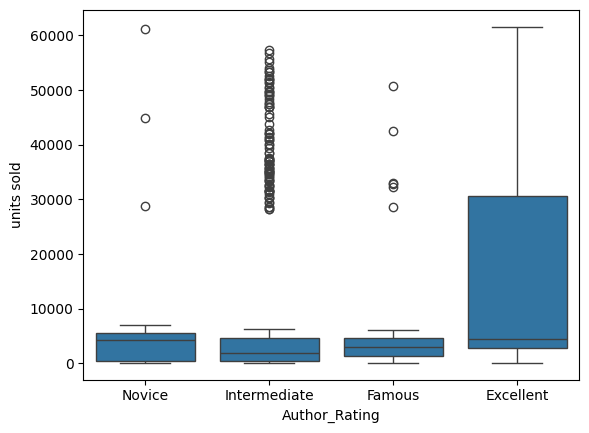

In [77]:
sns.boxplot(x='Author_Rating', y='units sold', data=df);

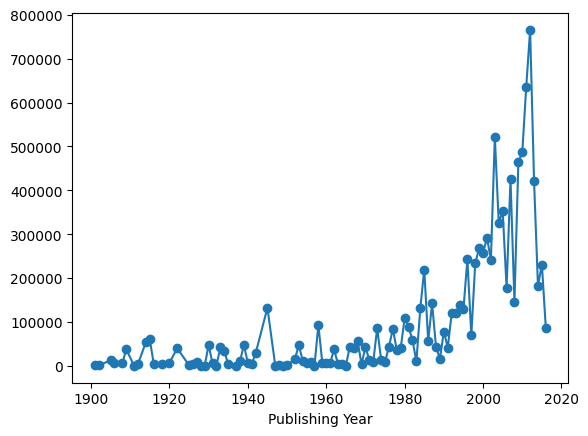

In [79]:
df.groupby('Publishing Year')['units sold'].sum().plot(kind="line", marker="o");

In [80]:
print(df.columns)

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')


In [82]:
import scipy.stats as stats

# Separando os grupos
grupo_A = df[df['Author_Rating'] == 'Famous']['units sold']
grupo_B = df[df['Author_Rating'] == 'Intermediate']['units sold']

# Realizando o teste de Student para amostras independentes
t_start, p_val = stats.ttest_ind(grupo_A, grupo_B, equal_var=False)

#Exibir os resultados
print(f"Estáticas t: {t_start:.4f}")
print(f"Valor p: {p_val:.4f}")

Estáticas t: -0.6595
Valor p: 0.5121
